<a href="https://colab.research.google.com/github/basharbayatna/NGO_Literacy-Rate/blob/main/NGO_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [150]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Data/literacy_rates_updated - literacy_rates_updated.csv'
df=pd.read_csv(fpath)

In [152]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276


# 1) We will start by Cleaning The Data (Missing Values, Duplicates, Converting Data Type and any inconsistencies

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3309 non-null   object
 1   Country        3313 non-null   object
 2   Year           3313 non-null   object
 3   Age            3313 non-null   object
 4   Gender         3313 non-null   object
 5   Literacy rate  3308 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


In [154]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

np.int64(10)

In [155]:
duplicated_rows = df.duplicated(keep=False)
duplicated_rows.sum()

np.int64(20)

In [156]:

df = df.drop_duplicates()

In [157]:
df.duplicated().sum()

np.int64(0)

-After checking we dont have any duplicates Left

# 2) Ensuring that the data types are aligned with the dictionary attached we will start will the missing values

In [158]:
df.isna().sum()

,0
Region,4
Country,0
Year,0
Age,0
Gender,0
Literacy rate,5


- we have 4 missing values in the 'Region' and 5 in the 'Literacy rate'

In [159]:
df['Region']=df['Region'].fillna('MISSING')


In [160]:
df['Region'].value_counts()

,count
Region,
Latin America and the Caribbean,940
Sub-Saharan Africa,770
Northern Africa and Western Asia,568
Europe and Northern America,336
Central and Southern Asia,307
Eastern and South-Eastern Asia,282
Oceania,96
MISSING,4


- Now for the Literacy rate	we will use a -1 place holder

In [161]:
df['Literacy rate']=df['Literacy rate'].fillna(-1)


In [162]:
df['Literacy rate'].value_counts()

,count
Literacy rate,
1,19
0.996,7
0.992,5
0.997,5
-1,5
...,...
0.9633402,1
0.9648063,1
0.9901156,1


- After handling the Missing values we will see if there is any inconsistencies

In [163]:
for i in df:
  print(f'Value count for {i}')
  print(df[i].value_counts())
  print('\n')
  print('\n')

Value count for Region
Region
Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           307
Eastern and South-Eastern Asia      282
Oceania                              96
MISSING                               4
Name: count, dtype: int64




Value count for Country
Country
Uruguay                72
Mexico                 72
Brazil                 72
Azerbaijan             64
Argentina              64
                       ..
Guinea-Bissau           8
Niger                   8
Nigeria                 8
South Sudan             8
Antigua and Barbuda     4
Name: count, Length: 155, dtype: int64




Value count for Year
Year
2018     574
2011     454
2014     439
2010     400
2012     344
2015     316
2013     264
2016     264
2017     246
2011_      1
3014       1
Name: count, dtype: int64




Value count for Age
Age
<15      840
15-24    826
25-64    8

In [164]:
df['Year'].value_counts()

,count
Year,
2018,574
2011,454
2014,439
2010,400
2012,344
2015,316
2013,264
2016,264
2017,246


- as we saw there is a problem with 'Year' and'Gender'  

- Starting with the Year we need to replace the backslash in '2011_' and there is a typo in '3014' which is most probably '2014'

In [165]:
df['Year']=df['Year'].replace('2011_' , '2011')
df['Year']=df['Year'].replace('3014' , '2014')


In [166]:
df['Year'].value_counts()

,count
Year,
2018,574
2011,455
2014,440
2010,400
2012,344
2015,316
2013,264
2016,264
2017,246


- all the inconsistencies in the 'Year' Column is handled now to adjuste the 'Gender'

In [167]:
df['Gender'].value_counts()

,count
Gender,
female,1648
male,1648
F,4
M,3


In [168]:
df['Gender']=df['Gender'].replace({'F': 'female', 'M': 'male'})

In [169]:
df['Gender'].value_counts()

,count
Gender,
female,1652
male,1651


- now we do anthor check to ensure we handled everything

In [170]:
for i in df:
  print(f'Value count for {i}')
  print(df[i].value_counts())
  print('\n')
  print('\n')

Value count for Region
Region
Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           307
Eastern and South-Eastern Asia      282
Oceania                              96
MISSING                               4
Name: count, dtype: int64




Value count for Country
Country
Uruguay                72
Mexico                 72
Brazil                 72
Azerbaijan             64
Argentina              64
                       ..
Guinea-Bissau           8
Niger                   8
Nigeria                 8
South Sudan             8
Antigua and Barbuda     4
Name: count, Length: 155, dtype: int64




Value count for Year
Year
2018    574
2011    455
2014    440
2010    400
2012    344
2015    316
2013    264
2016    264
2017    246
Name: count, dtype: int64




Value count for Age
Age
<15      840
15-24    826
25-64    826
65+      811
Name: count, dtype:

- another thing we can do is to see how many unique values we have

In [171]:
unique = df.nunique()
unique

,0
Region,8
Country,155
Year,9
Age,4
Gender,2
Literacy rate,3237


we can also calculate the unique percentage

In [172]:
unique_percent = unique/len(df)*100
unique_percent

,0
Region,0.242204
Country,4.692704
Year,0.272480
Age,0.121102
Gender,0.060551
Literacy rate,98.001817


- The last thing to do is to change the types of columns to be as the dictionary provided

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3303 non-null   object
 1   Country        3303 non-null   object
 2   Year           3303 non-null   object
 3   Age            3303 non-null   object
 4   Gender         3303 non-null   object
 5   Literacy rate  3303 non-null   object
dtypes: object(6)
memory usage: 180.6+ KB


- we must change Year to int and the Lateracy Rate to float

In [174]:
df['Year'] = pd.to_numeric(df['Year'], errors='raise')


In [175]:
df['Year'].dtype

dtype('int64')

In [176]:
df['Literacy rate'].value_counts()

,count
Literacy rate,
1,19
0.996,7
0.992,5
0.997,5
-1,5
...,...
0.9633402,1
0.9648063,1
0.9901156,1


-there is a '45.38%' value that needs to be -1

In [177]:
df['Literacy rate'] = df['Literacy rate'].replace('45.38%', '-1')


In [178]:
df['Literacy rate'] = df['Literacy rate'].astype(float)


In [179]:
df['Literacy rate'].dtype

dtype('float64')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   int64  
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


# Now to check our overall work (Duplicates, missing values, inconsistencies)

In [181]:
df.duplicated().sum()

np.int64(0)

In [182]:
df.isna().sum()

,0
Region,0
Country,0
Year,0
Age,0
Gender,0
Literacy rate,0


In [183]:
for i in df:
     print(f'Value count for {i}')
     print(df[i].value_counts())
     print('\n')
     print('\n')



Value count for Region
Region
Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           307
Eastern and South-Eastern Asia      282
Oceania                              96
MISSING                               4
Name: count, dtype: int64




Value count for Country
Country
Uruguay                72
Mexico                 72
Brazil                 72
Azerbaijan             64
Argentina              64
                       ..
Guinea-Bissau           8
Niger                   8
Nigeria                 8
South Sudan             8
Antigua and Barbuda     4
Name: count, Length: 155, dtype: int64




Value count for Year
Year
2018    574
2011    455
2014    440
2010    400
2012    344
2015    316
2013    264
2016    264
2017    246
Name: count, dtype: int64




Value count for Age
Age
<15      840
15-24    826
25-64    826
65+      811
Name: count, dtype:

In [186]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,MISSING,Afghanistan,2011,15-24,female,0.321132
3,MISSING,Afghanistan,2011,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128


# All the Data Cleaning is Done

# 2) Data Exploration

# Univariate Plots

- in terms of business questions there is some questions thats worth answering by the Univarite plots
1) Region Count
2) Years Distribution

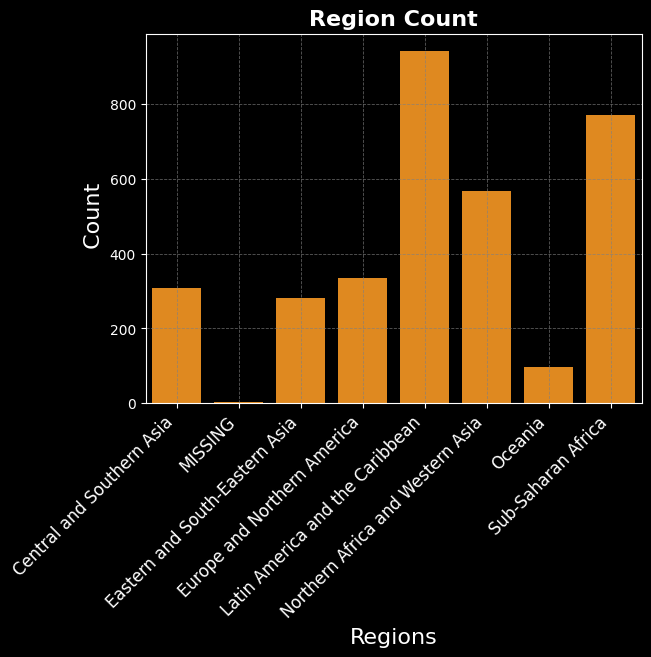

In [290]:

plt.style.use("dark_background")
ax= sns.countplot(data=df, x='Region',color='#FF8C00',edgecolor='None')



ax.set_title('Region Count', fontsize=16, fontweight='bold')
ax.set_xlabel('Regions', fontsize=16)
ax.set_ylabel(' Count', fontsize=16)

ax.grid(True, color='gray', linestyle='--', linewidth=0.6, alpha=0.7)
plt.xticks(rotation=45, ha='right',fontsize=12)

plt.show()

- The plot shows that Latin America and the Caribbean has the highest data count, followed by Sub-Saharan Africa, while Oceania and the MISSING category have the lowest.

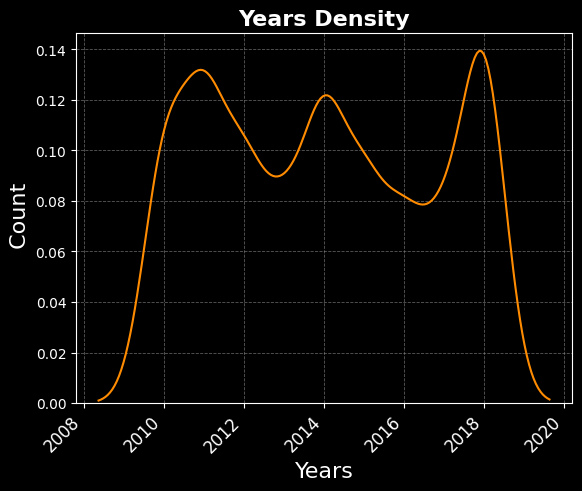

In [292]:

plt.style.use("dark_background")
ax = sns.kdeplot(data=df, x='Year',color='#FF8C00')



ax.set_title('Years Density', fontsize=16, fontweight='bold')
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel(' Count', fontsize=16)

ax.grid(True, color='gray', linestyle='--', linewidth=0.6, alpha=0.7)
plt.xticks(rotation=45, ha='right',fontsize=12)

plt.show()







- the data is not uniformly distributed across the years, with the highest concentrations of data points observed in 2011 and 2018

# Multivariate Plots

- in terms of business questions there is some questions thats worth answering by the Multivariate plots
1) the the distribution of Literacy rate across the Regions
2) the the distribution of Literacy rate across the two Genders
3) the the distribution of Literacy rate across the Age Grouped by the Gender

/tmp/ipython-input-2222896359.py:3: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'white'}` instead.

  ax = sns.barplot(data=df, x='Region', y='Literacy rate',


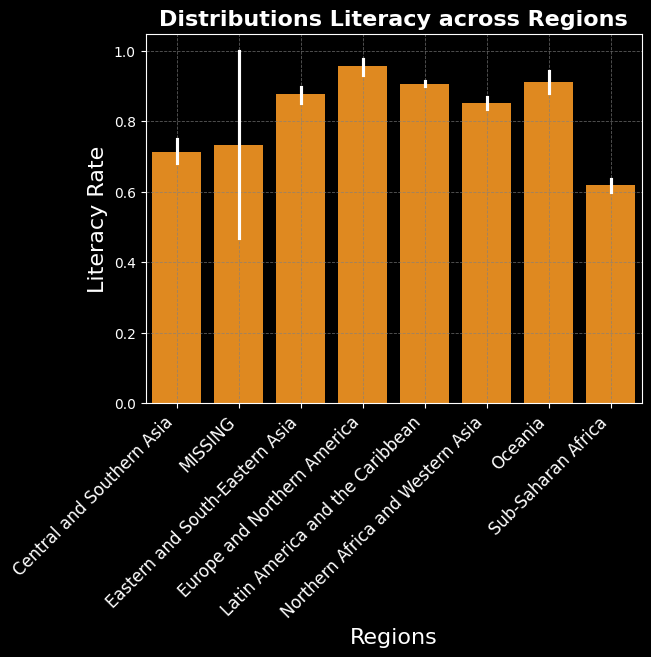

In [255]:
plt.style.use("dark_background")

ax = sns.barplot(data=df, x='Region', y='Literacy rate',
                  color='#FF8C00',edgecolor='None' ,errcolor='white')




ax.set_title('Distributions Literacy across Regions', fontsize=16, fontweight='bold')
ax.set_xlabel('Regions', fontsize=16)
ax.set_ylabel('Literacy Rate', fontsize=16)

ax.grid(True, color='gray', linestyle='--', linewidth=0.6, alpha=0.7)
plt.xticks(rotation=45, ha='right',fontsize=12)

plt.show()


- We can see from the graph that the sub-Sahara Africa has the lowest Literacy rate, where Europe and northern America has the highest

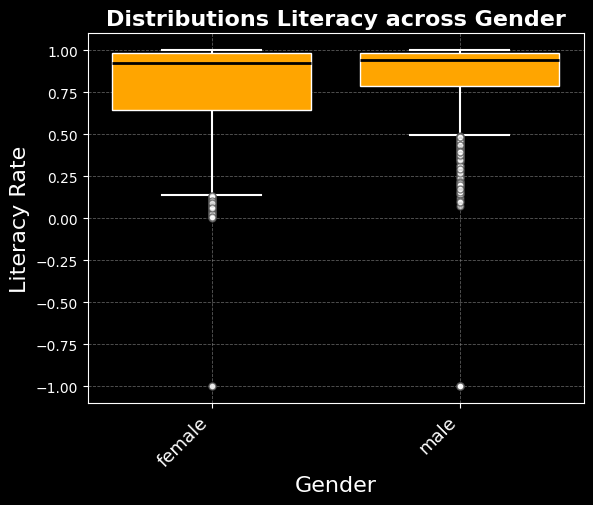

In [253]:
plt.style.use("dark_background")

ax = sns.boxplot(data=df, x='Gender', y='Literacy rate',
                  color='#FF8C00', whiskerprops=dict(color='white', linewidth=1.5)
                  , medianprops=dict(color='black', linewidth=2), capprops=dict(color='white', linewidth=1.5) ,
                 flierprops=dict(marker='o', markerfacecolor='white', markersize=5, alpha=0.7) ,
                  boxprops=dict(facecolor='orange', edgecolor='white')
)


ax.set_title('Distributions Literacy across Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=16)
ax.set_ylabel('Literacy Rate', fontsize=16)

ax.grid(True, color='gray', linestyle='--', linewidth=0.6, alpha=0.7)
plt.xticks(rotation=45, ha='right',fontsize=13)

plt.show()






- The plot indicates that both genders generally have a high literacy rate. However, the distribution for females shows a slightly lower median and a wider spread compared to males. Both groups contain several outlier but the outliers on the male side are higher

/tmp/ipython-input-2092870248.py:3: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'white'}` instead.

  ax = sns.barplot(data=df, x='Age', y='Literacy rate', hue='Gender',


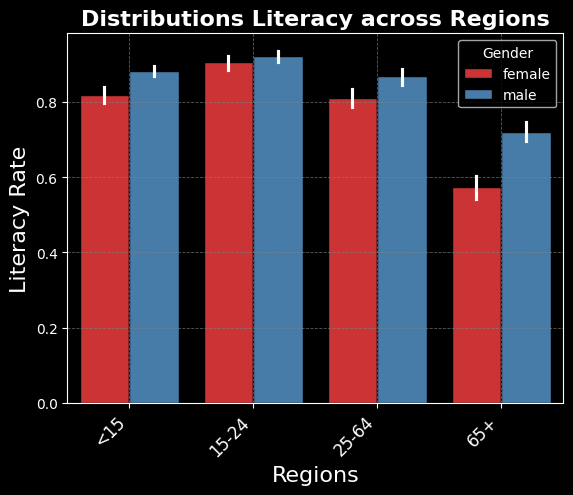

In [301]:


plt.style.use("dark_background")

ax = sns.barplot(data=df, x='Age', y='Literacy rate', hue='Gender',
                  palette='Set1',edgecolor='black'
                 ,errcolor='white')




ax.set_title('Distributions Literacy across Regions', fontsize=16, fontweight='bold')
ax.set_xlabel('Regions', fontsize=16)
ax.set_ylabel('Literacy Rate', fontsize=16)

ax.grid(True, color='gray', linestyle='--', linewidth=0.6, alpha=0.7)
plt.xticks(rotation=45, ha='right',fontsize=12)

plt.show()






- in general males consistently have higher literacy rates than females across all age groups. Literacy peaks in the 15–24 age group for both genders and drops significantly in the 65+ age group.